<a href="https://colab.research.google.com/github/BaronVonBussin/Stuff/blob/main/TimeSeries_SP500_Toy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


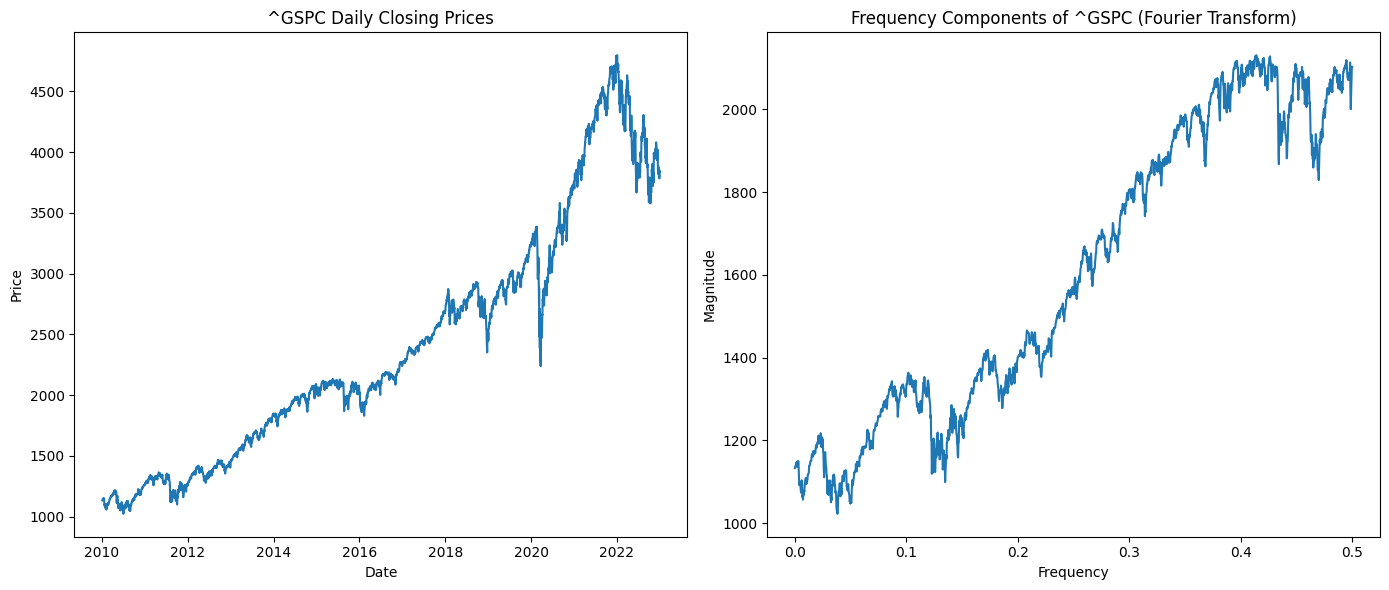

Dominant Frequencies: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Step 1: Download stock index data (for example, S&P 500 - '^GSPC')
symbol = '^GSPC'  # Replace with the desired stock index symbol
start_date = '2010-01-01'
end_date = '2023-01-01'

# Download data from Yahoo Finance
data = yf.download(symbol, start=start_date, end=end_date)

# Step 2: Preprocess the data (we'll use the 'Close' price for the analysis)
stock_prices = data['Close'].dropna()

# Step 3: Apply Fourier Transform (FFT)
n = len(stock_prices)  # Number of data points
fft_result = np.fft.fft(stock_prices)  # Perform FFT on the closing prices

# Step 4: Analyze and visualize the results
# Frequency axis (in terms of number of points)
frequencies = np.fft.fftfreq(n)

# Get the magnitude of each frequency component
fft_magnitude = np.abs(fft_result)

# Step 5: Plotting the original stock prices and the frequency components

# Plot the original stock prices
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(stock_prices)
plt.title(f'{symbol} Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')

# Plot the frequency components (magnitude of FFT)
plt.subplot(1, 2, 2)
plt.plot(frequencies[:n//2], fft_magnitude[:n//2])  # Only positive frequencies
plt.title(f'Frequency Components of {symbol} (Fourier Transform)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

# Optional: If you want to see the dominant frequency components
dominant_frequencies = frequencies[np.argsort(fft_magnitude)[-10:]]  # Top 10 dominant frequencies
print(f"Dominant Frequencies: {dominant_frequencies}")


[*********************100%***********************]  1 of 1 completed


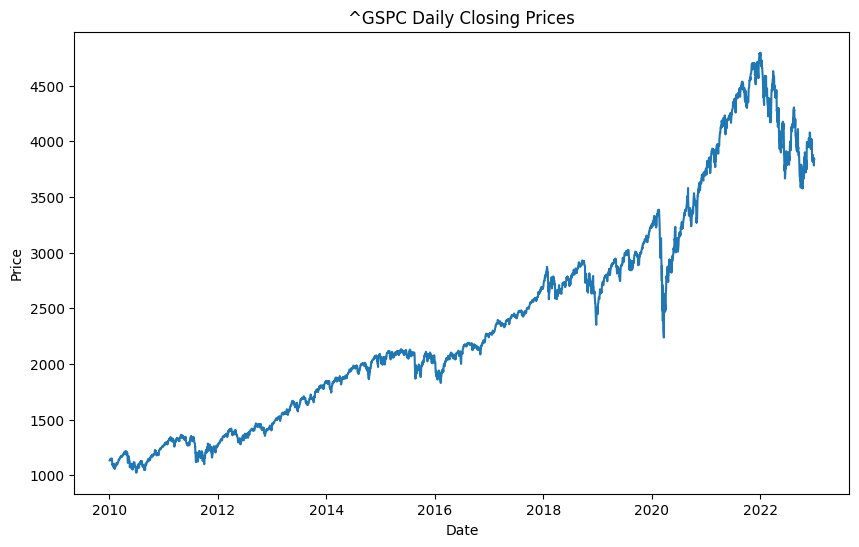

ADF Statistic: -0.5726348948837516
p-value: 0.8770463105985717


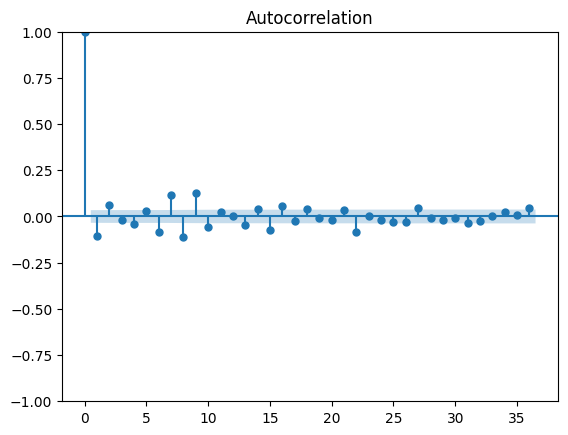

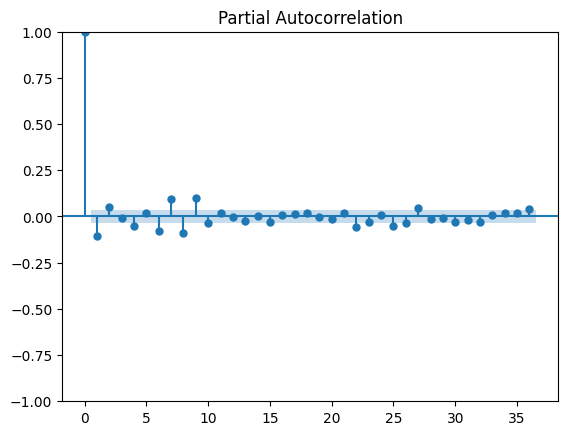

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  ^GSPC   No. Observations:                 3272
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -15757.455
Date:                Mon, 02 Dec 2024   AIC                          31520.910
Time:                        23:01:43   BIC                          31539.189
Sample:                             0   HQIC                         31527.456
                               - 3272                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3960      0.051     -7.837      0.000      -0.495      -0.297
ma.L1          0.2898      0.053      5.444      0.000       0.185       0.394
sigma2       895.5430      8.536    104.920      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


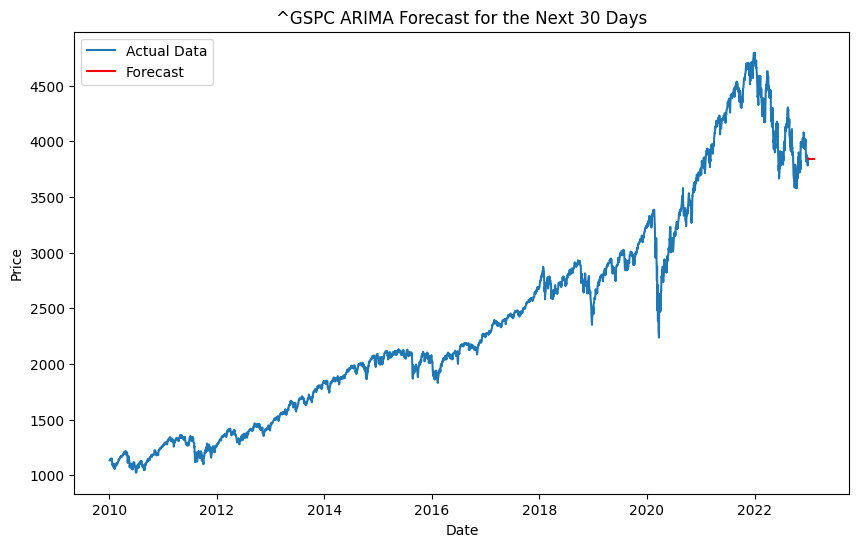

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Download stock index data (for example, S&P 500 - '^GSPC')
symbol = '^GSPC'  # Replace with the desired stock index symbol
start_date = '2010-01-01'
end_date = '2023-01-01'

# Download data from Yahoo Finance
data = yf.download(symbol, start=start_date, end=end_date)

# Step 2: Preprocess the data (we'll use the 'Close' price for the analysis)
stock_prices = data['Close'].dropna()

# Step 3: Visualize the stock prices
plt.figure(figsize=(10, 6))
plt.plot(stock_prices)
plt.title(f'{symbol} Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Step 4: Check if the series is stationary (using Augmented Dickey-Fuller test)
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(stock_prices)
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# If p-value is greater than 0.05, the series is likely non-stationary. We'll difference it.

# Step 5: Differencing to make the series stationary (if necessary)
# We'll difference the series once to make it stationary
stock_prices_diff = stock_prices.diff().dropna()

# Step 6: Plot ACF and PACF to determine p and q for ARIMA model
plot_acf(stock_prices_diff)
plot_pacf(stock_prices_diff)
plt.show()

# Based on ACF/PACF plots, choose p and q.
# Let's assume p=1, d=1, q=1 for simplicity.

# Step 7: Fit ARIMA model (p=1, d=1, q=1)
model = ARIMA(stock_prices, order=(1, 1, 1))
model_fit = model.fit()

# Step 8: Summary of the model
print(model_fit.summary())

# Step 9: Forecast the next 30 days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Step 10: Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, label='Actual Data')
plt.plot(pd.date_range(stock_prices.index[-1], periods=forecast_steps+1, freq='B')[1:], forecast, label='Forecast', color='red')
plt.title(f'{symbol} ARIMA Forecast for the Next {forecast_steps} Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# Step 1: Download stock index data (for example, S&P 500 - '^GSPC')
symbol = '^GSPC'  # Replace with the desired stock index symbol
start_date = '2010-01-01'
end_date = '2023-01-01'

# Download data from Yahoo Finance
data = yf.download(symbol, start=start_date, end=end_date)

# Step 2: Preprocess the data (we'll use the 'Close' price for the analysis)
stock_prices = data['Close'].dropna()

# Step 3: Visualize the stock prices
plt.figure(figsize=(10, 6))
plt.plot(stock_prices)
plt.title(f'{symbol} Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Step 4: Check if the series is stationary (using Augmented Dickey-Fuller test)
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(stock_prices)
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# If p-value is greater than 0.05, the series is likely non-stationary. We'll difference it.

# Step 5: Differencing to make the series stationary (if necessary)
# We'll difference the series once to make it stationary
stock_prices_diff = stock_prices.diff().dropna()

# Step 6: Plot ACF and PACF to determine p and q for ARIMA model
plot_acf(stock_prices_diff)
plot_pacf(stock_prices_diff)
plt.show()

# Based on ACF/PACF plots, choose p and q.
# Let's assume p=1, d=1, q=1 for simplicity.

# Step 7: Fit ARIMA model (p=1, d=1, q=1)
model = ARIMA(stock_prices, order=(1, 1, 1))
model_fit = model.fit()

# Step 8: Summary of the model
print(model_fit.summary())

# Step 9: Forecast the next 30 days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Step 10: Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, label='Actual Data')
plt.plot(pd.date_range(stock_prices.index[-1], periods=forecast_steps+1, freq='B')[1:], forecast, label='Forecast', color='red')
plt.title(f'{symbol} ARIMA Forecast for the Next {forecast_steps} Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


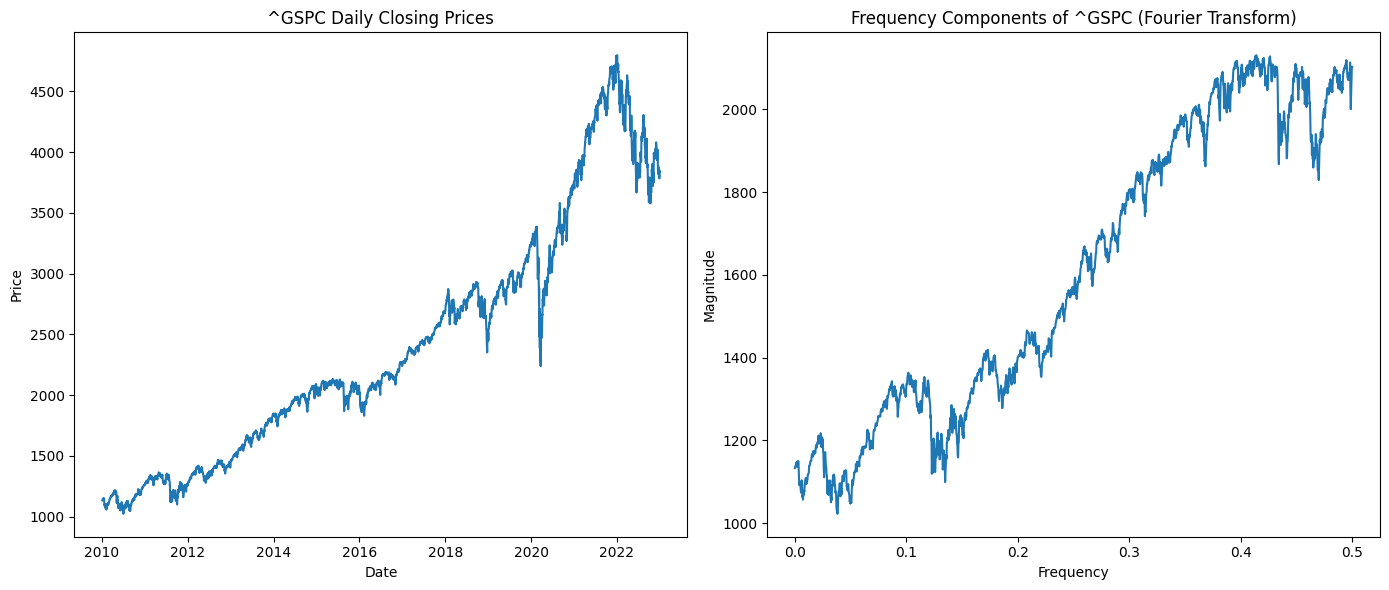

Dominant Frequencies: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


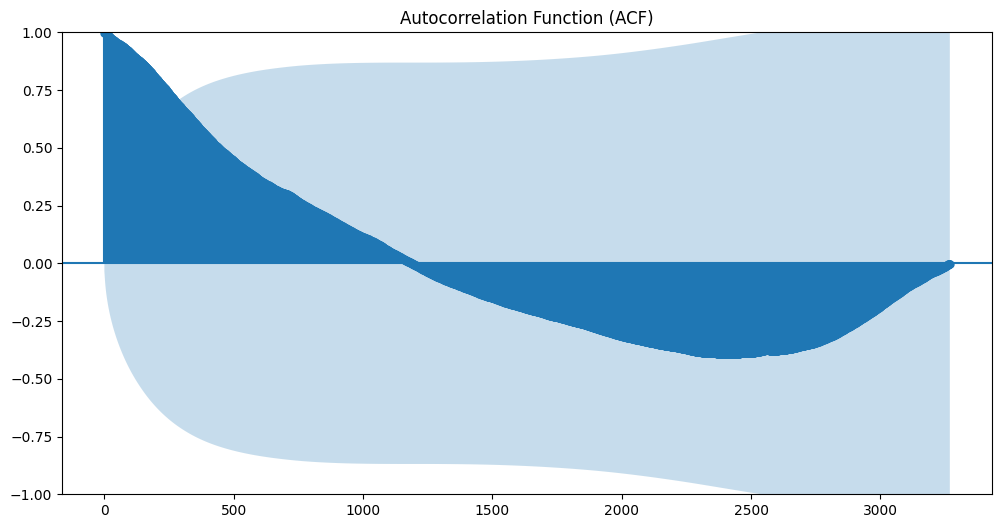

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 3268 must be < 1636.

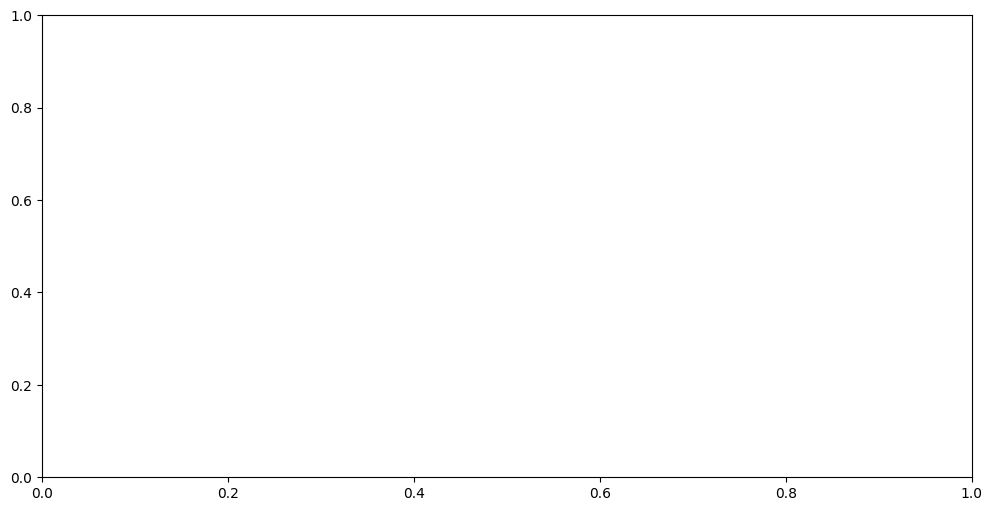

In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Import for ACF and PACF plots

# Step 1: Download stock index data (for example, S&P 500 - '^GSPC')
symbol = '^GSPC'  # Replace with the desired stock index symbol
start_date = '2010-01-01'
end_date = '2023-01-01'

# Download data from Yahoo Finance
data = yf.download(symbol, start=start_date, end=end_date)

# Step 2: Preprocess the data (we'll use the 'Close' price for the analysis)
stock_prices = data['Close'].dropna()

# Step 3: Apply Fourier Transform (FFT)
n = len(stock_prices)  # Number of data points
fft_result = np.fft.fft(stock_prices)  # Perform FFT on the closing prices

# Step 4: Analyze and visualize the results
# Frequency axis (in terms of number of points)
frequencies = np.fft.fftfreq(n)

# Get the magnitude of each frequency component
fft_magnitude = np.abs(fft_result)

# Step 5: Plotting the original stock prices and the frequency components

# Plot the original stock prices
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(stock_prices)
plt.title(f'{symbol} Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')

# Plot the frequency components (magnitude of FFT)
plt.subplot(1, 2, 2)
plt.plot(frequencies[:n//2], fft_magnitude[:n//2])  # Only positive frequencies
plt.title(f'Frequency Components of {symbol} (Fourier Transform)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

# Optional: If you want to see the dominant frequency components
dominant_frequencies = frequencies[np.argsort(fft_magnitude)[-10:]]  # Top 10 dominant frequencies
print(f"Dominant Frequencies: {dominant_frequencies}")

# Calculate and plot ACF with lags starting from 3
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(stock_prices, lags=len(stock_prices) - 4, zero=False, ax=ax)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Calculate and plot PACF with lags starting from 3
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(stock_prices, lags=len(stock_prices) - 4, zero=False, ax=ax)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

[*********************100%***********************]  1 of 1 completed


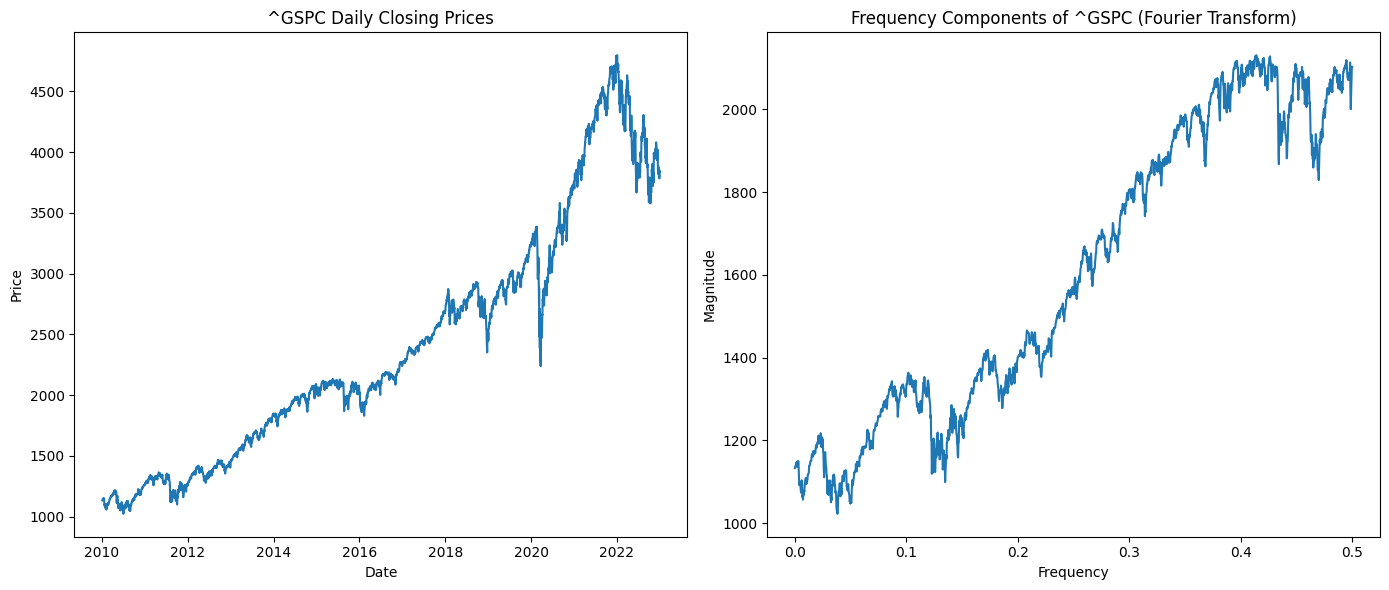

Dominant Frequencies: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


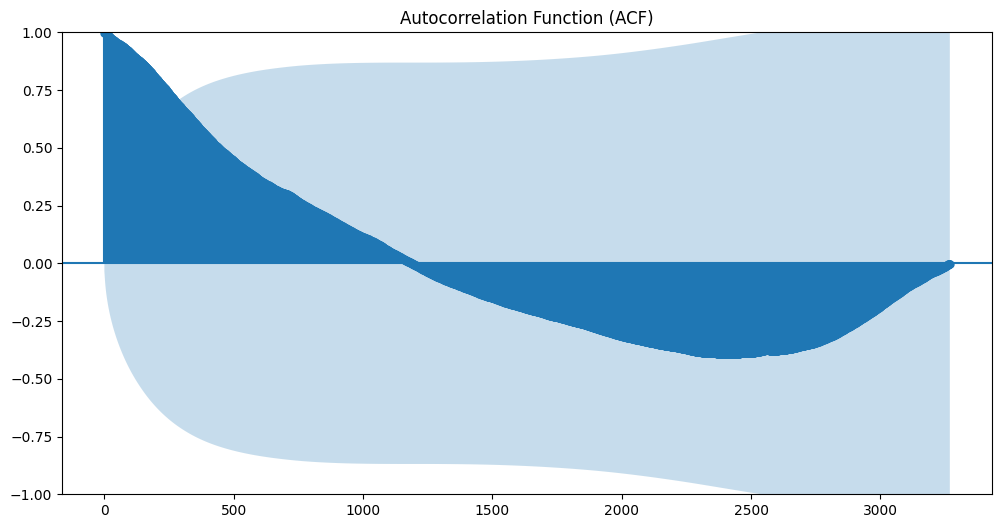

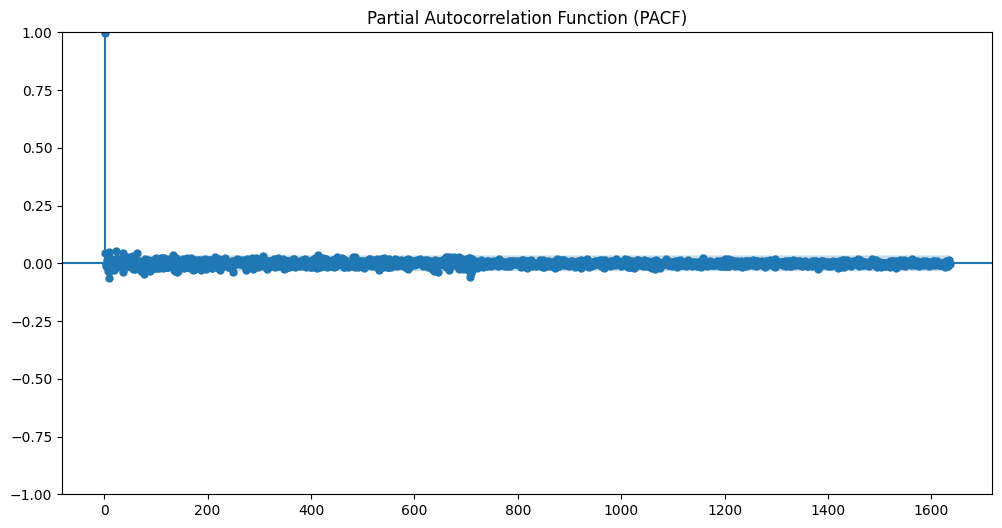

In [ ]:

# Step 1: Download stock index data (for example, S&P 500 - '^GSPC')
symbol = '^GSPC'  # Replace with the desired stock index symbol
start_date = '2010-01-01'
end_date = '2023-01-01'

# Download data from Yahoo Finance
data = yf.download(symbol, start=start_date, end=end_date)

# Step 2: Preprocess the data (we'll use the 'Close' price for the analysis)
stock_prices = data['Close'].dropna()

# Step 3: Apply Fourier Transform (FFT)
n = len(stock_prices)  # Number of data points
fft_result = np.fft.fft(stock_prices)  # Perform FFT on the closing prices

# Step 4: Analyze and visualize the results
# Frequency axis (in terms of number of points)
frequencies = np.fft.fftfreq(n)

# Get the magnitude of each frequency component
fft_magnitude = np.abs(fft_result)

# Step 5: Plotting the original stock prices and the frequency components

# Plot the original stock prices
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(stock_prices)
plt.title(f'{symbol} Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')

# Plot the frequency components (magnitude of FFT)
plt.subplot(1, 2, 2)
plt.plot(frequencies[:n//2], fft_magnitude[:n//2])  # Only positive frequencies
plt.title(f'Frequency Components of {symbol} (Fourier Transform)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

# Optional: If you want to see the dominant frequency components
dominant_frequencies = frequencies[np.argsort(fft_magnitude)[-10:]]  # Top 10 dominant frequencies
print(f"Dominant Frequencies: {dominant_frequencies}")

# Calculate and plot ACF with lags starting from 3
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(stock_prices, lags=len(stock_prices) - 4, zero=False, ax=ax)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Calculate and plot PACF with lags starting from 3
fig, ax = plt.subplots(figsize=(12, 6))
max_lags = len(stock_prices) // 2 - 1  # Calculate maximum allowed lags (50% of sample size)
plot_pacf(stock_prices, lags=min(len(stock_prices) - 4, max_lags), zero=False, ax=ax) # Use min to ensure lags within limit
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()